# Ames Housing Price Predictions

### The following notebook demonstrates regressive analysis on the Ames housing price <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data">dataset</a> available publicly on Kaggle and how using several features of a house in Ames, Iowa, we can predict the approximate price value for which the house can be sold at that time.

### The notebook demonstrates basic to intermediate practices in Data Science for Regression Modeling and elementary knowledge of statistics, Machine Learning and Visualizations is recommended to understand the procedures ahead, in a better way.


Fun fact: Housing in real estate is a 100 Trillion USD Industry, globally.

For more knowledge about the features of the houses present in the data, visit the link <a href="https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1537626436&Signature=IyRtQ%2Fkz%2BAmT0flkJXreMuMJvUEXFeKKQf8emXX4Q5ZHxpxhw8MZYQ60jgh2jqMzjTsjsRXX4z0wEG2EsojFkh%2BuDwrZ803t3VWFSToRlDkxQTJ%2FjEYREFT3j7EoQrAnIW2y57xh6qENDDDXRzx4M5UhvnDuAB89%2FxTC%2BgLG7GVF5cpTF3u9sx1gPNsFW3IUDrao5aY1eW8CtN%2BmcxCnSH0IQ7LN1TX6EM%2BdNz8%2FgPBGpjytUKFscmC%2B6LCa3UFSzBI2UX7kE4ZLQywrGmNDMJxjE8q8T%2ByRv1ciqGI3eW3wR49hF4is5mvgisJeHR80uomJWJi8wvqu%2F9d8Peb4qQ%3D%3D">here</a>.

Importing the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

%matplotlib inline

Importing the dataset:

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

As mentioned in the data description, there is data for about 1460 houses in the training dataset. However the values of features: Alley, PoolQC, Fence and MiscFeature are provided only for a few houses (91,7,281,54 respectively). For such features, values of more than 75% of houses are missing and hence does not count important to be included in the final dataset. Therefore we will get rid of them.

In [4]:
train = train.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1)
test = test.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1)

There are too many categorical features in the dataset and hence we need to encode them into numeric forms first.

In [5]:
#encoding MSZoning to numeric values
labels = train['MSZoning'].astype('category').cat.categories.tolist()
replace_map = {'MSZoning' : {k:v for k,v in zip(labels,range(1,len(labels)+1))}}
train.replace(replace_map,inplace=True)



#encoding Street to numeric values
labels = train['Street'].astype('category').cat.categories.tolist()
replace_map = {'Street' : {k:v for k,v in zip(labels,range(1,len(labels)+1))}}
train.replace(replace_map,inplace=True)



#encoding LotShape to numeric values
replace_map = {'LotShape' : {'Reg':4,'IR1':3,'IR2':2,'IR3':1}}
train.replace(replace_map,inplace=True)



#encoding LandContour to numeric values
replace_map = {'LandContour' : {'Lvl':4,'Bnk':3,'HLS':2,'Low':1}}
train.replace(replace_map,inplace=True)



#encoding Utilities to numeric values
replace_map = {'Utilities' : {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1}}
train.replace(replace_map,inplace=True)



#encoding LotConfig to numeric values
replace_map = {'LotConfig' : {'Inside':5,'Corner':4,'CulDSac':3,'FR2':2,'FR3':1}}
train.replace(replace_map,inplace=True)



#encoding LandSlope to numeric values
replace_map = {'LandSlope' : {'Gtl':3,'Mod':2,'Sev':1}}
train.replace(replace_map,inplace=True)



#encoding Neighborhood to numeric values
labels = train['Neighborhood'].astype('category').cat.categories.tolist()
replace_map = {'Neighborhood' : {k:v for k,v in zip(labels,range(1,len(labels)+1))}}
train.replace(replace_map,inplace=True)



#encoding Condition1 to numeric values
labels = train['Condition1'].astype('category').cat.categories.tolist()
replace_map = {'Condition1' : {k:v for k,v in zip(labels,range(1,len(labels)+1))}}
train.replace(replace_map,inplace=True)



#encoding Condition2 to numeric values
labels = train['Condition2'].astype('category').cat.categories.tolist()
replace_map = {'Condition2' : {k:v for k,v in zip(labels,range(1,len(labels)+1))}}
train.replace(replace_map,inplace=True)



#encoding BldgType to numeric values
replace_map = {'BldgType' : {'1Fam':5,'2fmCon':4,'Duplex':3,'TwnhsE':2,'Twnhs':1}}
train.replace(replace_map,inplace=True)



#encoding HouseStyle to numeric values
replace_map = {'HouseStyle' : {'1Story':8,'1.5Fin':7,'1.5Unf':6,'2Story':5, \
                               '2.5Fin':4, '2.5Unf':3, 'SFoyer':2, 'SLvl':1}}
train.replace(replace_map,inplace=True)



#encoding RoofStyle to numeric values
replace_map = {'RoofStyle' : {'Flat':6,'Gable':5,'Gambrel':4,'Hip':3, 'Mansard':2, 'Shed':1}}
train.replace(replace_map,inplace=True)



#encoding RoofMatl to numeric values
replace_map = {'RoofMatl' : {'ClyTile':1,'CompShg':2,'Membran':3,'Metal':4, \
                             'Roll':5, 'Tar&Grv':6, 'WdShake':7, 'WdShngl':8}}
train.replace(replace_map,inplace=True)



#encoding Exterior1st to numeric values
labels = train['Exterior1st'].astype('category').cat.categories.tolist()
replace_map = {'Exterior1st' : {k:v for k,v in zip(labels,range(1,len(labels)+1))}}
train.replace(replace_map,inplace=True)



#encoding Exterior2nd to numeric values
labels = train['Exterior2nd'].astype('category').cat.categories.tolist()
replace_map = {'Exterior2nd' : {k:v for k,v in zip(labels,range(1,len(labels)+1))}}
train.replace(replace_map,inplace=True)



#encoding MasVnrType to numeric values
replace_map = {'MasVnrType' : {'BrkCmn':1,'BrkFace':2,'CBlock':3,'None':-1,'Stone':4}}
train.replace(replace_map,inplace=True)



#encoding ExterQual to numeric values
replace_map = {'ExterQual' : {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':-1}}
train.replace(replace_map,inplace=True)



#encoding ExterCond to numeric values
replace_map = {'ExterCond' : {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':-1}}
train.replace(replace_map,inplace=True)



#encoding Foundation to numeric values
replace_map = {'Foundation' : {'BrkTil':1,'CBlock':2,'PConc':3,'Slab':4,'Stone':5, 'Wood':6}}
train.replace(replace_map,inplace=True)



#encoding BsmtCond to numeric values
replace_map = {'BsmtCond' : {'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2, 'NA':-1}}
train.replace(replace_map,inplace=True)



#encoding BsmtExposure to numeric values
replace_map = {'BsmtExposure' : {'Gd':5,'Av':4,'Mn':3,'No':1, 'NA':-1}}
train.replace(replace_map,inplace=True)



#encoding BsmtFinType1 to numeric values
replace_map = {'BsmtFinType1' : {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1, 'NA':-1}}
train.replace(replace_map,inplace=True)



#encoding BsmtFinType2 to numeric values
replace_map = {'BsmtFinType2' : {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1, 'NA':-1}}
train.replace(replace_map,inplace=True)



#encoding Heating to numeric values
replace_map = {'Heating' : {'Floor':6,'GasA':5,'GasW':4,'Grav':3,'OthW':2,'Wall':1}}
train.replace(replace_map,inplace=True)



#encoding HeatingQC to numeric values
replace_map = {'HeatingQC' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}}
train.replace(replace_map,inplace=True)



#encoding CentralAir to numeric values
replace_map = {'CentralAir' : {'N':0,'Y':1}}
train.replace(replace_map,inplace=True)



#encoding Electrical to numeric values
replace_map = {'Electrical' : {'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1}}
train.replace(replace_map,inplace=True)



#encoding KitchenQual to numeric values
replace_map = {'KitchenQual' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}}
train.replace(replace_map,inplace=True)



#encoding Functional to numeric values
replace_map = {'Functional' : {'Typ':4,'Min1':3,'Min2':2,'Mod':1,'Maj1':-1, 'Maj2':-2 , 'Sev':-3, 'Sal':-4 }}
train.replace(replace_map,inplace=True)



#encoding GarageType to numeric values
replace_map = {'GarageType' : {'2Types':6,'Attchd':5,'Basment':4,'BuiltIn':3,'CarPort':2, 'Detchd': 1, 'NA': -1 }}
train.replace(replace_map,inplace=True)



#encoding GarageFinish to numeric values
replace_map = {'GarageFinish' : {'Fin':3,'RFn':2, 'Unf':1,'NA':-1}}
train.replace(replace_map,inplace=True)



#encoding GarageQual to numeric values
replace_map = {'GarageQual' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}}
train.replace(replace_map,inplace=True)



#encoding GarageCond to numeric values
replace_map = {'GarageCond' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}}
train.replace(replace_map,inplace=True)



#encoding PavedDrive to numeric values
replace_map = {'PavedDrive' : {'Y':3,'P':2,'N':1}}
train.replace(replace_map,inplace=True)



#encoding SaleType to numeric values
replace_map = {'SaleType' : {'WD':10,'CWD':9,'VWD':8,'New':7,'COD':6,'Con':5,'ConLw':4,'ConLI':3,'ConLD':2,'Oth':1}}
train.replace(replace_map,inplace=True)



#encoding SaleCondition to numeric values
replace_map = {'SaleCondition' : {'Normal':6,'Abnorml':5,'AdjLand':4, 'Alloca':3, 'Family':2, 'Partial':1}}
train.replace(replace_map,inplace=True)

In [6]:
#encoding BsmtQual to numeric values
replace_map = {'BsmtQual' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}}
train.replace(replace_map,inplace=True)

Similarly encoding the categorical values in test dataset.

In [7]:
#encoding MSZoning to numeric values
labels = test['MSZoning'].astype('category').cat.categories.tolist()
replace_map = {'MSZoning' : {k:v for k,v in zip(labels,range(1,len(labels)+1))}}
test.replace(replace_map,inplace=True)



#encoding Street to numeric values
labels = test['Street'].astype('category').cat.categories.tolist()
replace_map = {'Street' : {k:v for k,v in zip(labels,range(1,len(labels)+1))}}
test.replace(replace_map,inplace=True)



#encoding LotShape to numeric values
replace_map = {'LotShape' : {'Reg':4,'IR1':3,'IR2':2,'IR3':1}}
test.replace(replace_map,inplace=True)



#encoding LandContour to numeric values
replace_map = {'LandContour' : {'Lvl':4,'Bnk':3,'HLS':2,'Low':1}}
test.replace(replace_map,inplace=True)



#encoding Utilities to numeric values
replace_map = {'Utilities' : {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1}}
test.replace(replace_map,inplace=True)



#encoding LotConfig to numeric values
replace_map = {'LotConfig' : {'Inside':5,'Corner':4,'CulDSac':3,'FR2':2,'FR3':1}}
test.replace(replace_map,inplace=True)



#encoding LandSlope to numeric values
replace_map = {'LandSlope' : {'Gtl':3,'Mod':2,'Sev':1}}
test.replace(replace_map,inplace=True)



#encoding Neighborhood to numeric values
labels = test['Neighborhood'].astype('category').cat.categories.tolist()
replace_map = {'Neighborhood' : {k:v for k,v in zip(labels,range(1,len(labels)+1))}}
test.replace(replace_map,inplace=True)



#encoding Condition1 to numeric values
labels = test['Condition1'].astype('category').cat.categories.tolist()
replace_map = {'Condition1' : {k:v for k,v in zip(labels,range(1,len(labels)+1))}}
test.replace(replace_map,inplace=True)



#encoding Condition2 to numeric values
labels = test['Condition2'].astype('category').cat.categories.tolist()
replace_map = {'Condition2' : {k:v for k,v in zip(labels,range(1,len(labels)+1))}}
test.replace(replace_map,inplace=True)



#encoding BldgType to numeric values
replace_map = {'BldgType' : {'1Fam':5,'2fmCon':4,'Duplex':3,'TwnhsE':2,'Twnhs':1}}
test.replace(replace_map,inplace=True)



#encoding HouseStyle to numeric values
replace_map = {'HouseStyle' : {'1Story':8,'1.5Fin':7,'1.5Unf':6,'2Story':5, \
                               '2.5Fin':4, '2.5Unf':3, 'SFoyer':2, 'SLvl':1}}
test.replace(replace_map,inplace=True)



#encoding RoofStyle to numeric values
replace_map = {'RoofStyle' : {'Flat':6,'Gable':5,'Gambrel':4,'Hip':3, 'Mansard':2, 'Shed':1}}
test.replace(replace_map,inplace=True)



#encoding RoofMatl to numeric values
replace_map = {'RoofMatl' : {'ClyTile':1,'CompShg':2,'Membran':3,'Metal':4, \
                             'Roll':5, 'Tar&Grv':6, 'WdShake':7, 'WdShngl':8}}
test.replace(replace_map,inplace=True)



#encoding Exterior1st to numeric values
labels = test['Exterior1st'].astype('category').cat.categories.tolist()
replace_map = {'Exterior1st' : {k:v for k,v in zip(labels,range(1,len(labels)+1))}}
test.replace(replace_map,inplace=True)



#encoding Exterior2nd to numeric values
labels = test['Exterior2nd'].astype('category').cat.categories.tolist()
replace_map = {'Exterior2nd' : {k:v for k,v in zip(labels,range(1,len(labels)+1))}}
test.replace(replace_map,inplace=True)



#encoding MasVnrType to numeric values
replace_map = {'MasVnrType' : {'BrkCmn':1,'BrkFace':2,'CBlock':3,'None':-1,'Stone':4}}
test.replace(replace_map,inplace=True)



#encoding ExterQual to numeric values
replace_map = {'ExterQual' : {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':-1}}
test.replace(replace_map,inplace=True)



#encoding ExterCond to numeric values
replace_map = {'ExterCond' : {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':-1}}
test.replace(replace_map,inplace=True)



#encoding Foundation to numeric values
replace_map = {'Foundation' : {'BrkTil':1,'CBlock':2,'PConc':3,'Slab':4,'Stone':5, 'Wood':6}}
test.replace(replace_map,inplace=True)



#encoding BsmtCond to numeric values
replace_map = {'BsmtCond' : {'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2, 'NA':-1}}
test.replace(replace_map,inplace=True)



#encoding BsmtExposure to numeric values
replace_map = {'BsmtExposure' : {'Gd':5,'Av':4,'Mn':3,'No':1, 'NA':-1}}
test.replace(replace_map,inplace=True)



#encoding BsmtFinType1 to numeric values
replace_map = {'BsmtFinType1' : {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1, 'NA':-1}}
test.replace(replace_map,inplace=True)



#encoding BsmtFinType2 to numeric values
replace_map = {'BsmtFinType2' : {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1, 'NA':-1}}
test.replace(replace_map,inplace=True)



#encoding Heating to numeric values
replace_map = {'Heating' : {'Floor':6,'GasA':5,'GasW':4,'Grav':3,'OthW':2,'Wall':1}}
test.replace(replace_map,inplace=True)



#encoding HeatingQC to numeric values
replace_map = {'HeatingQC' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}}
test.replace(replace_map,inplace=True)



#encoding CentralAir to numeric values
replace_map = {'CentralAir' : {'N':0,'Y':1}}
test.replace(replace_map,inplace=True)



#encoding Electrical to numeric values
replace_map = {'Electrical' : {'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1}}
test.replace(replace_map,inplace=True)



#encoding KitchenQual to numeric values
replace_map = {'KitchenQual' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}}
test.replace(replace_map,inplace=True)



#encoding Functional to numeric values
replace_map = {'Functional' : {'Typ':4,'Min1':3,'Min2':2,'Mod':1,'Maj1':-1, 'Maj2':-2 , 'Sev':-3, 'Sal':-4 }}
test.replace(replace_map,inplace=True)



#encoding GarageType to numeric values
replace_map = {'GarageType' : {'2Types':6,'Attchd':5,'Basment':4,'BuiltIn':3,'CarPort':2, 'Detchd': 1, 'NA': -1 }}
test.replace(replace_map,inplace=True)



#encoding GarageFinish to numeric values
replace_map = {'GarageFinish' : {'Fin':3,'RFn':2, 'Unf':1,'NA':-1}}
test.replace(replace_map,inplace=True)



#encoding GarageQual to numeric values
replace_map = {'GarageQual' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}}
test.replace(replace_map,inplace=True)



#encoding GarageCond to numeric values
replace_map = {'GarageCond' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}}
test.replace(replace_map,inplace=True)



#encoding PavedDrive to numeric values
replace_map = {'PavedDrive' : {'Y':3,'P':2,'N':1}}
test.replace(replace_map,inplace=True)



#encoding SaleType to numeric values
replace_map = {'SaleType' : {'WD':10,'CWD':9,'VWD':8,'New':7,'COD':6,'Con':5,'ConLw':4,'ConLI':3,'ConLD':2,'Oth':1}}
test.replace(replace_map,inplace=True)



#encoding SaleCondition to numeric values
replace_map = {'SaleCondition' : {'Normal':6,'Abnorml':5,'AdjLand':4, 'Alloca':3, 'Family':2, 'Partial':1}}
test.replace(replace_map,inplace=True)

In [8]:
#encoding BsmtQual to numeric values
replace_map = {'BsmtQual' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}}
test.replace(replace_map,inplace=True)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null float64
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null int64
LotShape         1459 non-null int64
LandContour      1459 non-null int64
Utilities        1457 non-null float64
LotConfig        1459 non-null int64
LandSlope        1459 non-null int64
Neighborhood     1459 non-null int64
Condition1       1459 non-null int64
Condition2       1459 non-null int64
BldgType         1459 non-null int64
HouseStyle       1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int64
RoofMatl         1459 non-null int64
Exterior1st      1458 non-null float64
Exterior2nd      1458 non-null flo

We could have handled the categorical features using functions from sklearn preprocessing module, but it encodes consecutive values according to the alphabetical order which could have affected the ordinal property of our features. Hence, encoding the categorical features by replacing by a mapping dictionary is more preferable in any categorical feature handling case especially if the values of the features are ordinal type.

Also, some of the features show some kind of similar relationships and we can take that to our advantage and reduce the number of columns. For eg. there are features YearBuilt, Year Remodeled, Year Sold. We can use this three features by combining them and forming one single feature representing how many years old is the property by the formula:

<b>YearOld = YrSold - YearRemodAdd</b>

We are subtracting the remodeled year since the building after remodeling can be considered as a fresh one.

In [10]:
train['YearOld'] = train['YrSold'] - train['YearRemodAdd']
test['YearOld'] = test['YrSold'] - test['YearRemodAdd']

In [11]:
train = train.drop(['YearBuilt','YrSold','YearRemodAdd'],axis=1)
test = test.drop(['YearBuilt','YrSold','YearRemodAdd'],axis=1)

Also, some features represent quality as well as condition of the infrastructures. Such as Exterior quality and condition, Basement quality and condition similarly for Garage.

We can compute a single feature representing both the quality and condition of the infrastructures by taking the mean of the individual features values.



In [12]:
train['ExterQualCond'] = (train['ExterQual']+train['ExterCond'])/2
test['ExterQualCond'] = (test['ExterQual']+test['ExterCond'])/2

In [13]:
train['BsmtQualCond'] = (train['BsmtQual']+train['BsmtCond'])/2
test['BsmtQualCond'] = (test['BsmtQual']+test['BsmtCond'])/2

In [14]:
train['GarageQualCond'] = (train['GarageQual']+train['GarageCond'])/2
test['GarageQualCond'] = (test['GarageQual']+test['GarageCond'])/2

In [15]:
train = train.drop(['ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','GarageCond'],axis=1)
test = test.drop(['ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','GarageCond'],axis=1)

Also, the values of Porch areas of the houses are given individually. How about combining them all, to form a single feature: Total Porch Area?

In [16]:
train['TotPorch'] = train['OpenPorchSF']+train['EnclosedPorch']+train['3SsnPorch']+train['ScreenPorch']
test['TotPorch'] = test['OpenPorchSF']+test['EnclosedPorch']+test['3SsnPorch']+test['ScreenPorch']

In [17]:
train = train.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1)
test = test.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1)

Let us set our target variable as the last column of the dataframe for convenience.

In [18]:
SalePrice = train['SalePrice']
train = train.drop(['SalePrice'],axis=1)

In [19]:
train['SalePrice'] = SalePrice

In [20]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,SaleType,SaleCondition,YearOld,ExterQualCond,BsmtQualCond,GarageQualCond,TotPorch,SalePrice
0,1,60,4,65.0,8450,2,4,4,4,5,...,0,2,10,6,5,2.5,4.0,3.0,61,208500
1,2,20,4,80.0,9600,2,4,4,4,2,...,0,5,10,6,31,2.0,4.0,3.0,0,181500
2,3,60,4,68.0,11250,2,3,4,4,5,...,0,9,10,6,6,2.5,4.0,3.0,42,223500
3,4,70,4,60.0,9550,2,3,4,4,4,...,0,2,10,5,36,2.0,4.0,3.0,307,140000
4,5,60,4,84.0,14260,2,3,4,4,2,...,0,12,10,6,8,2.5,4.0,3.0,84,250000


Also, we don't need indexing feature 'ID' so we get rid of it.

In [21]:
train = train.drop(['Id'],axis=1)
test = test.drop(['Id'],axis=1)

Since there are many features, let us check how much each feature are correlated to our target variable:

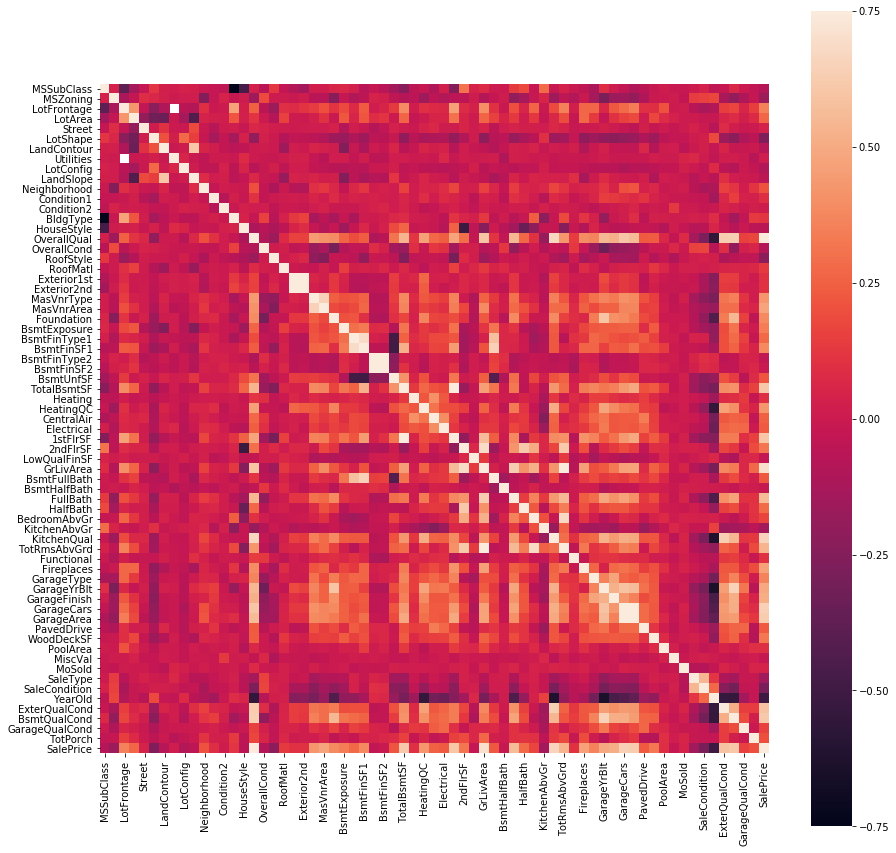

In [22]:
correlation_matrix = train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, vmin=-0.75, vmax=0.75, square=True)


As one can notice in the heatmap above, the strongest positive correlation with the target variable is shown by the feature <b>OverallQual, followed by GrLivArea, GarageCars and GarageArea, TotBsmtSF, KitchenQual</b> and so on...
Hence, the features which show strongest correlations with the target variables, are of utmost importance. 

Also talking about correlation, it doesn't matter if the correlation coefficient is positive or negative. The sign just indicates the incremental or decremental proportionality with the target variable <b>SalePrice</b>. What matters more, is that the absolute correlation coefficient is as close as possible to 1, indicating the importance of that feature, in order to predict the target variable. 

Now that we have the correlation values ready, let us perform some visualizations and see how can we process the dataset further:

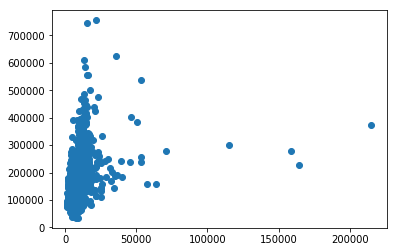

In [23]:
plt.scatter(train['LotArea'],train['SalePrice'])

The above scatter chart indicates the relationship between the LotArea and SalePrice. As one can notice, there are a few outliers in the chart which show lower amount of their SalePrice for higher amount of LotArea. This type of outlier can possibly hinder our way towards creating a better Machine Learning model, and hence we choose to ignore them. 

Below code states that we only take into our consideration, the tuples with LotArea values under 55000, and ignore the tuples with LotArea greater than those values:

In [24]:
train = train[train['LotArea']<55000]

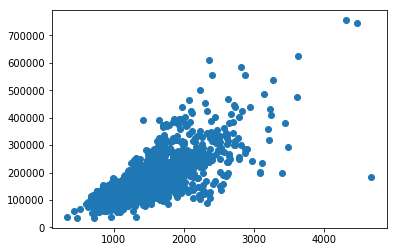

In [25]:
plt.scatter(train['GrLivArea'],train['SalePrice'])

In the above scatter chart too, we can notice there is an outlier with highest value of the feature GrLivArea but with very low SalePrice value. Hence we chose to eliminate it from our data set.

In [26]:
train = train[train['GrLivArea']<4500]

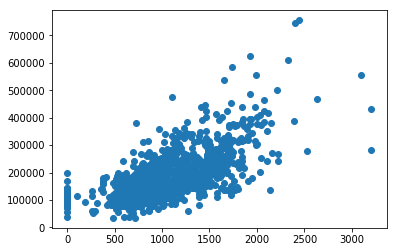

In [27]:
plt.scatter(train['TotalBsmtSF'],train['SalePrice'])

Here too, there are certain outliers on the right hand sides of the X axis, that we can notice. Also, we can see that there are certain points with TotalBsmtSF values equal to zero, but showing different values for SalePrice. We eliminate them too:

In [28]:
train = train[train['TotalBsmtSF']<2500]
train = train[train['TotalBsmtSF']>0]

Similarly, we carry on further to eliminate outliers from the rest of the features:

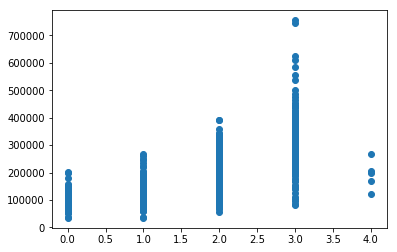

In [29]:
plt.scatter(train['GarageCars'],train['SalePrice'])

In [30]:
train = train[train['GarageCars']<3.75]

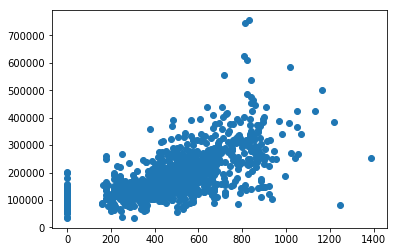

In [31]:
plt.scatter(train['GarageArea'],train['SalePrice'])

In [32]:
train = train[train['GarageArea']<1200]
train = train[train['GarageArea']>0]

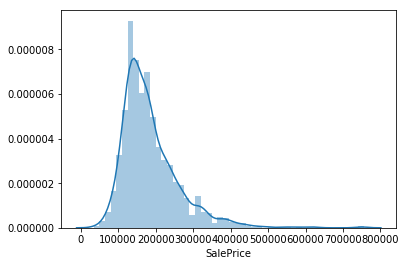

In [33]:
sns.distplot(train['SalePrice'])

As we can see, the data is somewhat skewed away from the normal distribution. Let us apply Log transformations to make it normally distributed.

In [34]:
train['SalePrice'] = np.log1p(train['SalePrice'])

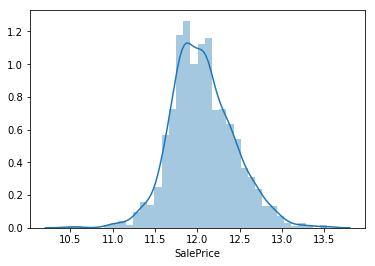

In [35]:
sns.distplot(train['SalePrice'])

Hence, now we have normal distribution of the target variable SalePrice.

Let us start with some visualization:

<Figure size 1440x1440 with 0 Axes>

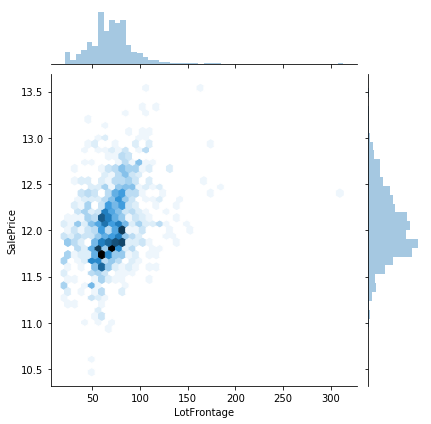

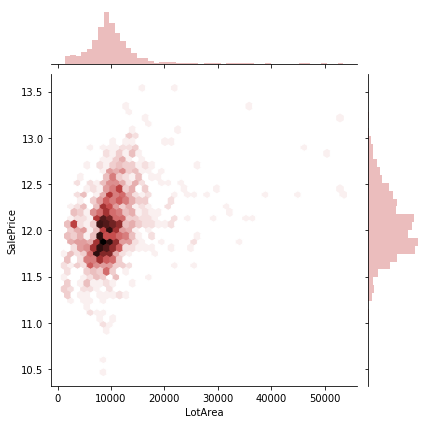

In [36]:
plt.figure(figsize=(20,20))
sns.jointplot(train['LotFrontage'],train['SalePrice'],kind="hex")
sns.jointplot(train['LotArea'],train['SalePrice'],kind="hex",color="indianred")

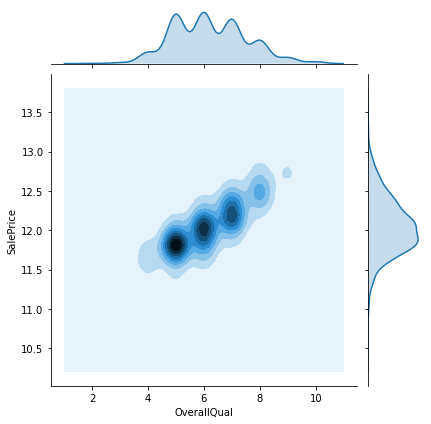

In [37]:
sns.jointplot(train['OverallQual'],train['SalePrice'],kind='kde')

Let us build our model and predict the result:

In [38]:
x = train.iloc[:,:-1].values
y = train.iloc[:,-1].values

x_eval = test.iloc[:,:].values

In the data information above, we see that majority of the features have little to no missing values, hence we prefer imputing the missing values with the values occuring most frequent.

Handling the missing values:

In [39]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
imputer = imputer.fit(x[:, :])
x[:,:] = imputer.transform(x[:,:])

In [40]:
from sklearn.preprocessing import Imputer
imputer1 = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
imputer1 = imputer1.fit(x_eval[:, :])
x_eval[:,:] = imputer1.transform(x_eval[:,:])

We can see that the above plot reveals positive proportionality between the features LotFrontage, LotArea and the target variable SalePrice. Therefore, they can be considered essential for predicting the sale price of the house.

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [42]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

rmse_dict = {}

regressors = [
    GradientBoostingRegressor(n_estimators = 5000, random_state = 0),
    RandomForestRegressor(n_estimators = 5000, random_state = 0),
    DecisionTreeRegressor(random_state=0),
    SVR(kernel='rbf')
]

for reg in regressors:
    name = reg.__class__.__name__
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    error = mean_squared_error(y_test,y_pred) 
    rmse_dict[name] = error

In [43]:
names=[]
rmse=[]
for key,value in rmse_dict.items():
    names.append(key)
    rmse.append(value)

In [44]:
df_vals = DataFrame(list(zip(names,rmse)),columns=['RMSE','Regressors'])

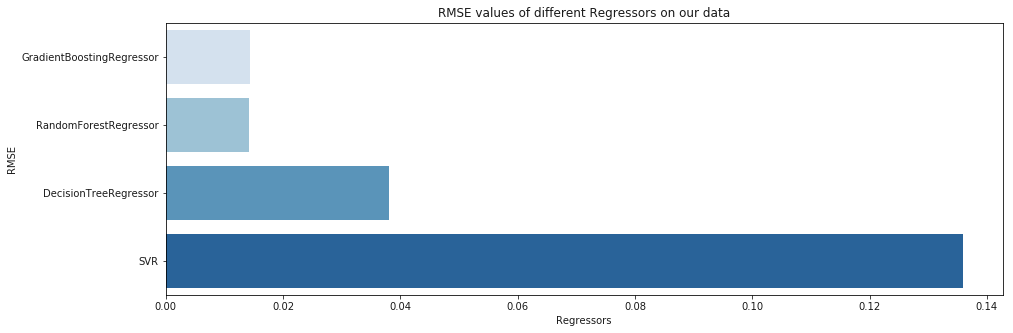

In [45]:
plt.figure(figsize=(15,5))
plt.title('RMSE values of different Regressors on our data')
sns.set_color_codes("muted")
sns.barplot(x='Regressors', y='RMSE', data=df_vals, palette="Blues")

As we can see, the RandomForestRegressor shows the minimum RMSE value, hence we chose that algorithm as our final model to predict values.

In [46]:
regressor1 = RandomForestRegressor(n_estimators = 5000, random_state = 0)
regressor1.fit(x_train,y_train)
y_pred = regressor1.predict(x_test)


y_test = np.expm1(y_test)
y_pred = np.expm1(y_pred)
DataFrame([y_test,y_pred])

,0,1,2,3,4,5,6,7,8,9,...,433,434,435,436,437,438,439,440,441,442
0,175900.00000,115000.000000,124500.000000,201000.000000,91000.000000,128500.000000,369900.000000,139500.000000,185000.000000,142000.00000,...,128500.000000,226000.000000,223500.000000,119500.000000,211000.000000,125000.000000,109000.000000,239799.000000,112000.000000,119500.000000
1,212586.00223,120217.575348,120604.738112,216292.415036,102550.260258,137213.681502,354418.431984,130576.848256,180850.117038,136557.01141,...,120200.106191,231875.868761,213527.993536,124420.061684,200543.976486,108370.273175,107254.247376,243089.207721,121789.235312,123468.147899


In [47]:
predictions = regressor1.predict(x_eval)
predictions = np.expm1(predictions)

In [48]:
predictions = DataFrame(predictions)
predictions.to_csv("pred_new.csv")

In [49]:
predictions

,0
0,123825.698772
1,153890.143649
2,184011.632227
3,181449.388355
4,201666.853954
5,180381.260415
6,164475.939315
7,170054.984102
8,182850.067245
9,124608.316648


Therefore, we have our final predictions of Sale Prices successfully computed using Machine Learning.

## Thanks for reading.